In [1]:
import os
import sys
sys.path.append(os.path.abspath('../'))

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import neural_lam.utils as utils
from neural_lam.constants import ERA5UKConstants

# Utils

In [6]:
def rollout_axs(
    ax, 
    var_name,
    rmses,
    labels,
):
    var_idx = ERA5UKConstants.PARAM_NAMES.index(var_name)
    var_unit = ERA5UKConstants.PARAM_UNITS[var_idx]
    
    for i, rmse in enumerate(rmses):
        ax.plot(rmse[var_idx], ".-", label=labels[i])

    if var_name in ERA5UKConstants.CLIMATOLOGY:
        var_clim = ERA5UKConstants.CLIMATOLOGY[var_name]
        ax.axhline(var_clim, color="grey", linestyle="--", label="Climatology")

    xticks_pos = range(0, rmses[0].shape[1], 2)
    xticks_labels = [str((tick + 1) * 6) for tick in xticks_pos]
    ax.set_xticks(xticks_pos)
    ax.set_xticklabels(xticks_labels)

    ax.legend()
    ax.set_xlabel("Lead Time (hours)")
    ax.set_ylabel(f"RMSE ({var_unit})")
    ax.set_title(f"Test RMSE: {var_name}")
    ax.grid(True)
    
def load_single_level_rmse(path, length=8):
    # eval on entire uk
    csv_path = f".{path}/files/test_rmse.csv"
    rmse = np.loadtxt(csv_path, delimiter=',').T
    if length is None:
        return rmse
    rmse = rmse[:, :length]
    # print(rmse.shape)
    return rmse

def load_space_attention_rmse(path, length=8):
    level_1_rmse_path = f".{path}/files/level-1_test_rmse.csv"
    level_1_rmse = np.loadtxt(level_1_rmse_path, delimiter=",").T
    # print(level_1_rmse.shape)p
    level_1_rmse = level_1_rmse[:, :length]

    level_0_rmse_path = f".{path}/files/level-0_test_rmse.csv"
    level_0_rmse = np.loadtxt(level_0_rmse_path, delimiter=",").T
    # print(level_0_rmse.shape)
    level_0_rmse = level_0_rmse[:, :length]
    
    return level_0_rmse, level_1_rmse

def score(a, b):
    count = np.sum(a > b) / (a.shape[0] * a.shape[1])
    pct_diff = np.mean((a - b) / b)
    print(count, pct_diff)

# More Training Data is Better

## Accuracy

In [ ]:
uk_small_rmse = load_single_level_rmse("/results/uk-small")


## Runtime comparison


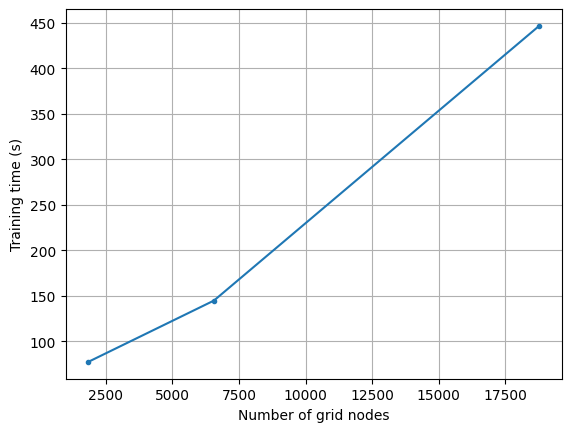

In [7]:
def num_grid_nodes(dataset):
    grid = np.load(f"../data/{dataset}/static/nwp_xy.npy")
    return grid.shape[1] * grid.shape[2]

# Baseline models
times = np.array([77.334, 144.767, 446.632])
uk_small = num_grid_nodes("era5_uk_small")
uk = num_grid_nodes("era5_uk")
uk_big = num_grid_nodes("era5_uk_big")
uk_max = num_grid_nodes("era5_uk_max")

grid_nodes = np.array([
    uk_small,
    # uk,
    uk_big,
    uk_max,
])

fig, ax = plt.subplots()
ax.plot(grid_nodes, times, ".-")
ax.set_xlabel("Number of grid nodes")
ax.set_ylabel("Training time (s)")
ax.grid()

# Space Resolution Results

In [85]:
# Space Resolution V1 UK Small Train results
path = "./wandb/offline-run-20240610_022656-189fmoyz"
_, uk_small_train_level_1_rmse_test = load_space_attention_rmse(path, 8)
score(uk_small_train_level_1_rmse_test, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_022856-1g5wx1zk"
_, uk_small_train_level_1_rmse_test_resid = load_space_attention_rmse(path, 8)
score(uk_small_train_level_1_rmse_test_resid, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_022857-kvqeou88"
_, uk_small_train_level_1_rmse_test_att = load_space_attention_rmse(path, 8)
score(uk_small_train_level_1_rmse_test_att, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_022857-wpgrdxu4"
_, uk_small_train_level_1_rmse_test_resid_att = load_space_attention_rmse(path, 8)
score(uk_small_train_level_1_rmse_test_resid_att, uk_big_local_rmse)

score(uk_big_local_rmse, uk_small_train_level_1_rmse_test_resid)


0.5182291666666666 -0.009396507683190879
0.3489583333333333 -0.028363596641130574
0.5651041666666666 0.01021645974179375
0.6796875 0.034183754348179336
0.6510416666666666 0.03387572455228526


In [172]:
path = "./wandb/offline-run-20240610_213742-1m39szm3"
_, uk_small_big_level_1_rmse_layer_norm = load_space_attention_rmse(path, 8)
score(uk_small_big_level_1_rmse_layer_norm, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_214003-awzpj563"
_, uk_small_big_level_1_rmse_layer_norm_resid = load_space_attention_rmse(path, 8)
score(uk_small_big_level_1_rmse_layer_norm_resid, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_214011-w3dgcdje"
_, uk_small_big_level_1_rmse_layer_norm_att = load_space_attention_rmse(path, 8)
score(uk_small_big_level_1_rmse_layer_norm_att, uk_big_local_rmse)

path = "./wandb/offline-run-20240610_214041-yjbcublz"
_, uk_small_big_level_1_rmse_layer_norm_resid_att = load_space_attention_rmse(path, 8)
score(uk_small_big_level_1_rmse_layer_norm_resid_att, uk_big_local_rmse)

0.8203125 0.04095454433622856
0.4947916666666667 0.007366018063378661
0.7083333333333334 0.026279795070468487
0.6875 0.01956255777494076


In [173]:
_, uk_small_big_v3_level_1_rmse = load_space_attention_rmse("./wandb/offline-run-20240611_181219-z89vpilc")
_, uk_small_big_v3_level_1_rmse_1 = load_space_attention_rmse("./wandb/offline-run-20240611_184511-cke3pfax")

score(uk_small_big_v3_level_1_rmse, uk_big_local_rmse)
score(uk_small_big_v3_level_1_rmse_1, uk_big_local_rmse)

ValueError: operands could not be broadcast together with shapes (48,12) (48,8) 

In [122]:
_, uk_small_max_level_1_rmse = load_space_attention_rmse("./wandb/offline-run-20240607_033537-ghutnlwk")
_, uk_small_max_v2_level_1_rmse = load_space_attention_rmse("./wandb/offline-run-20240607_033812-4uiaele1")

score(uk_small_max_level_1_rmse, uk_max_local_rmse)
score(uk_small_max_v2_level_1_rmse, uk_max_local_rmse)

0.6666666666666666 0.03134885237411237
0.6770833333333334 0.033545899848012685


In [88]:
score(uk_small_big_level_1_rmse_layer_norm, uk_max_local_rmse)

0.9010416666666666 0.1304904106997489


0.6666666666666666 0.03134885237411237
0.8619791666666666 0.12401606440577667


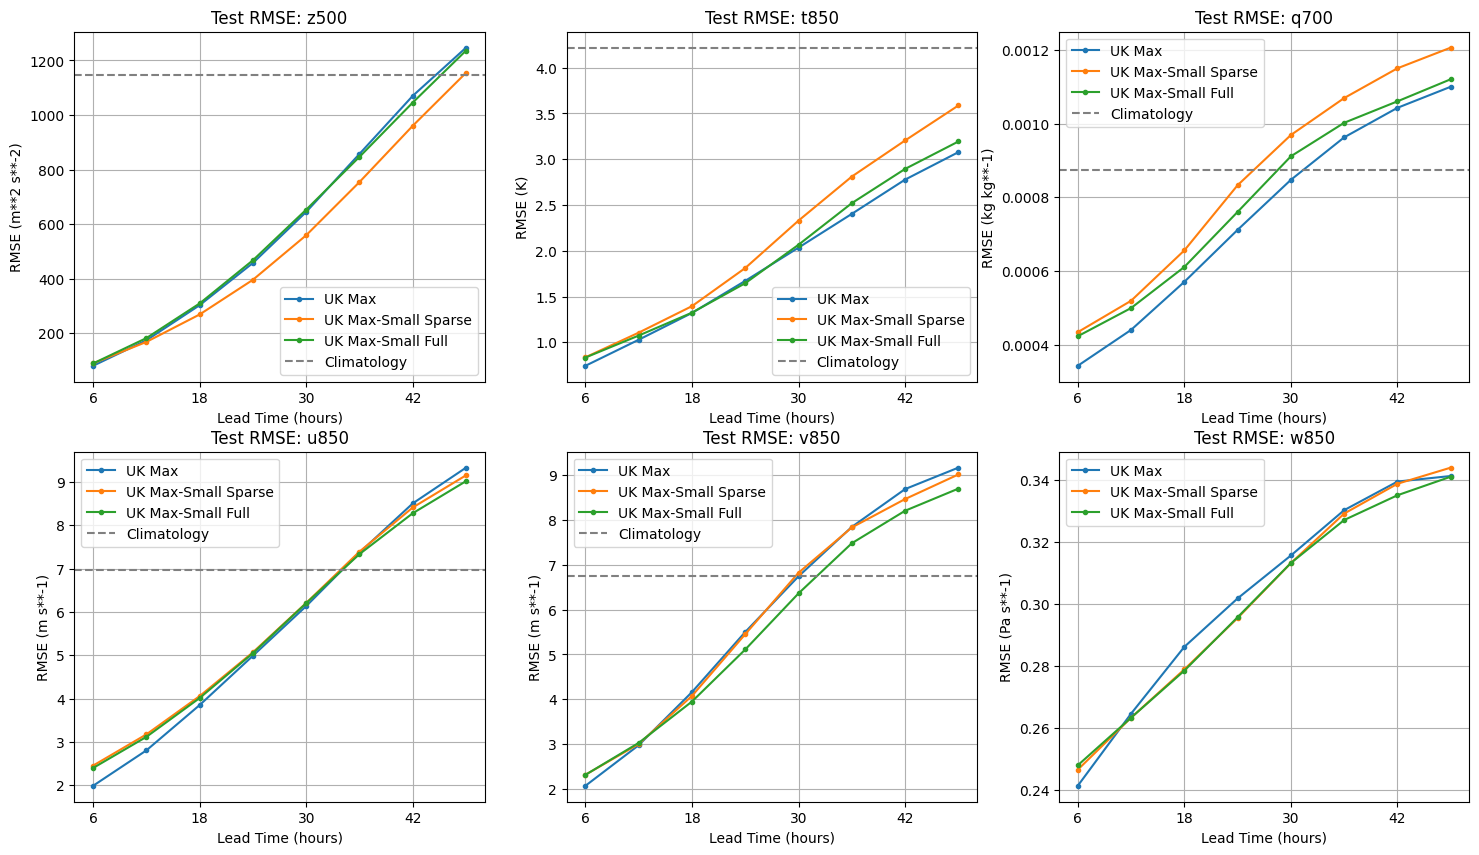

In [160]:
headline_vars = ["z500", "t850", "q700", "u850", "v850", "w850"]


fig, axs = plt.subplots(2, 3, figsize=(18, 10))
for ax, var_name in zip(axs.flat, headline_vars):
    rollout_axs(
        ax, 
        var_name,
        rmses=[
            # uk_big_local_rmse,
            # uk_small_train_level_1_rmse_test_resid,
            # uk_small_big_v3_level_1_rmse_1
            # uk_small_train_level_1_rmse_test,
            # uk_small_train_level_1_rmse_test_att,
            # uk_small_big_v3_level_1_rmse,
            uk_max_local_rmse,
            uk_small_max_level_1_rmse,
            uk_small_max_v2_level_1_rmse,
            # uk_small_train_level_1_rmse_test_resid_att,
        ],
        labels=[
            # "UK Big",
            # "UK Big-Small Sparse",
            # "UK Big-Small Full",
            # "UK Small",
            # "UK Small Att",
            # "UK Small Resid Att",
            # "UK Small Big V3",
            "UK Max",
            "UK Max-Small Sparse",
            "UK Max-Small Full",
        ]
    )

# score(uk_small_train_level_1_rmse_test_resid, uk_big_local_rmse)
# score(uk_small_big_v3_level_1_rmse, uk_big_local_rmse)

score(uk_small_max_level_1_rmse, uk_max_local_rmse)
score(uk_small_train_level_1_rmse_test_resid_att, uk_max_local_rmse)